In [10]:
# import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader,TensorDataset

C:\Users\DOANTR~1\AppData\Local\Temp/ipykernel_25680/2120876513.py:9: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


# The qwerties' doughnuts

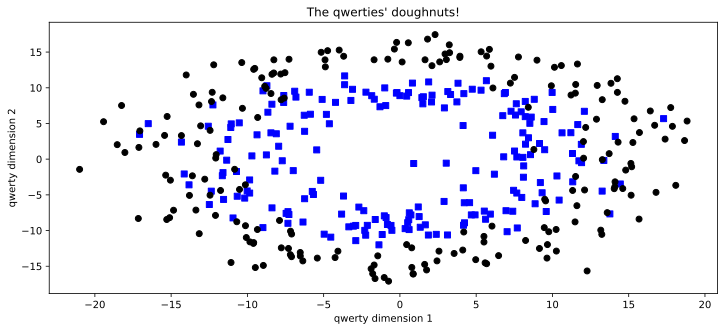

In [11]:
# Create data
n_per_clust = 200

theta = np.linspace(start=0, stop=4 * np.pi, num=n_per_clust) # Angle
r1 = 10 # Radius
r2 = 15

# Generate data (Circles)
a = [
    r1 * np.cos(theta) + np.random.randn(n_per_clust) * 3, # Cos + Noise
    r1 * np.sin(theta) + np.random.randn(n_per_clust)
]
b = [
    r2 * np.cos(theta) + np.random.randn(n_per_clust) * 3,
    r2 * np.sin(theta) + np.random.randn(n_per_clust)
]

# Concatanate into a matrix
data_np = np.hstack(tup=(a, b)).T

# True labels
labels_np = np.vstack(tup=(np.zeros(shape=(n_per_clust, 1)), np.ones(shape=(n_per_clust, 1))))

# Convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# Show the data
fig = plt.figure(figsize=(12, 5))
plt.plot(data[np.where(labels == 0)[0], 0], data[np.where(labels == 0)[0], 1], 'bs')
plt.plot(data[np.where(labels == 1)[0], 0], data[np.where(labels == 1)[0], 1], 'ko')
plt.title("The qwerties' doughnuts!")
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

# Separate the data into DataLoaders

In [12]:
# Separate the data into DataLoaders
# Use scikitlearn to split the data
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.1)

# Then convert them into PyTorch Datasets (note: already converted to tensors)
train_dataset = TensorDataset(train_data, train_labels)
test_dataset = TensorDataset(test_data, test_labels)

# Finally, translate into dataloader objects
train_batch_size = 16
test_batch_size = test_dataset.tensors[0].shape[0]
train_loader = DataLoader(dataset=train_dataset, batch_size=train_batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=test_batch_size)

# CHECK SIZES OF DATA BATCHES

In [13]:
# for X, y in train_loader:
#     print(f'{X.shape} | {y.shape}\n')

# print('----------')
for X, y in test_loader:
    print(f'{X.shape} | {y.shape}\n')   

torch.Size([40, 2]) | torch.Size([40, 1])



# Model stuff

In [14]:
class the_model_class(nn.Module):
  def __init__(self):
    super().__init__()

    # Layers
    self.input = nn.Linear(2, 128)
    self.hidden = nn.Linear(128, 128)
    self.output = nn.Linear(128, 1)
  
  # Forward pass
  def forward(self, x):
    x = F.relu(input=self.input(x))
    x = F.relu(input=self.hidden(x))
    x = self.output(x)

    return x

# FUNCTION THAT CREATES THE ANN MODEL

In [15]:
def create_a_new_model():

  # Grab an instance of the model class
  ANN_model = the_model_class()

  # Loss function
  loss_func = nn.BCEWithLogitsLoss()

  # Optimizer
  optimizer = torch.optim.SGD(params=ANN_model.parameters(), lr=0.01)

  return ANN_model, loss_func, optimizer

# TRAIN THE MODEL

In [16]:
# Global parameter
num_epochs = 500

def train_the_model(ANN_model, loss_func, optimizer):

  # Initialize accuracies as empties
  train_acc = []
  test_acc  = []

  # Loop over epochs
  for epoch_i in range(num_epochs):

    # Loop over training data batches
    batch_acc = []
    for X, y in train_loader:

      # Forward pass and loss
      y_hat = ANN_model(X)
      loss  = loss_func(y_hat, y)

      # Backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # Compute training accuracy just for this batch
      batch_acc.append(100 * torch.mean(((y_hat > 0) == y).float()).item())
    # End of batch loop...

    # Now that we've trained through the batches, get their average training accuracy
    train_acc.append(np.mean(batch_acc))

    # Test accuracy (NOTE: testing in batches!)
    test_acc_temp = []
    for X, y in test_loader:
      y_hat = ANN_model(X)
      test_acc_temp.append(100 * torch.mean(((y_hat > 0) == y).float()).item())
    # Now get the average accuracy over test-batches
    test_acc.append(np.mean(test_acc_temp))
  
  # Function output
  return train_acc, test_acc

# Application

In [17]:
# Create a model
ANN_QC, loss_func, optimizer = create_a_new_model()

# Train the model (note the inputs!)
train_acc, test_acc = train_the_model(ANN_model=ANN_QC, loss_func=loss_func, optimizer=optimizer)

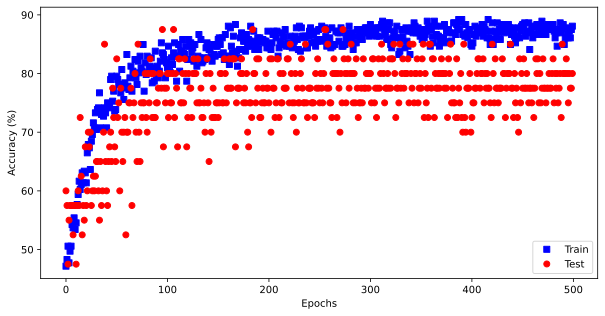

In [18]:
# Plot the results
plt.figure(figsize=(10, 5))

plt.plot(train_acc, 'bs')
plt.plot(test_acc,  'ro')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend(['Train', 'Test'])

plt.show()